# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-wIzUAwxh-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 74816.00 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101751.98 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 126872.44 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 142701.80 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 147619.42 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 152258.57 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 78466.37 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 110415.75 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 127616.00 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 139636.28 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 146764.85 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 151372.91 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.23 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.23 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.09 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.63 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.40 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.68 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.96 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.16 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.31 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.79 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.23 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.60 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.60 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.00 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.03 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.56 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.28 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.47 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 46.90 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.05 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.80 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 23.54 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.02 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 27.97 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 35.21 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:05, 26.94 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:03, 34.12 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 39.58 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 43.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:05<00:00, 45.75 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 45.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.28 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.29 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.27 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.03 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.71 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.24 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.50 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.33 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.84 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.79 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 37.95 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.98 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.44 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.60 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.70 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.06 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 49.55 examples/s]

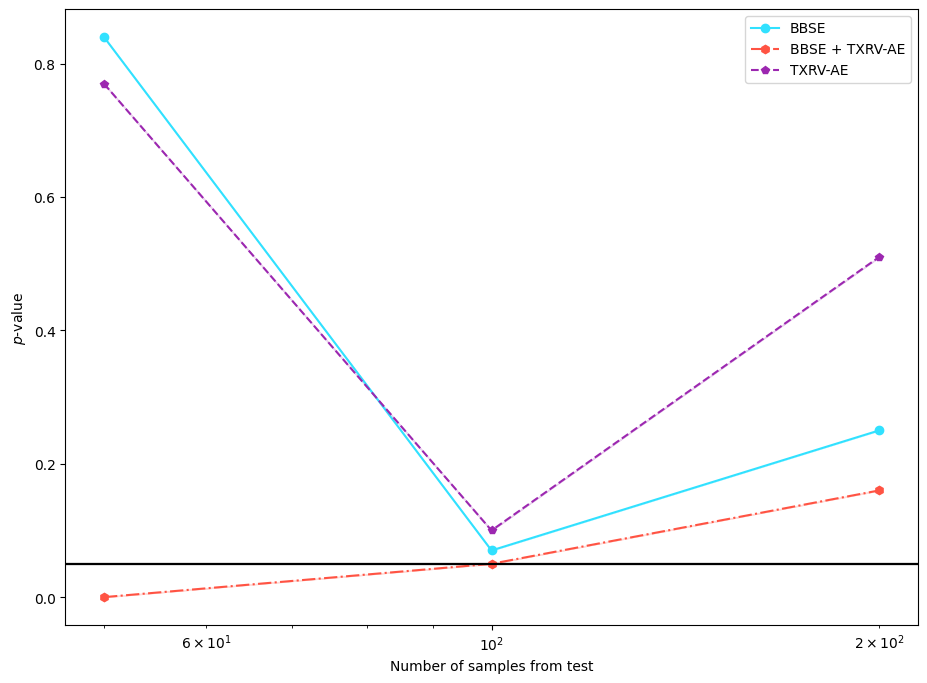

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.20 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.84 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.88 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.28 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.49 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:04, 16.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 28.90 examples/s]

Map:  96%|█████████▌| 96/100 [00:03<00:00, 37.63 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.12 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.05 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.51 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.86 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.69 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.35 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.57 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.10 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.93 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.06 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.86 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.14 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.97 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.00 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.83 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.81 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.08 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.07 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.09 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.41 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.46 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.64 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.64 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.25 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.68 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.30 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.31 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.04 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.97 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.77 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.92 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.72 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.52 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.56 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.24 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.57 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.04 examples/s]

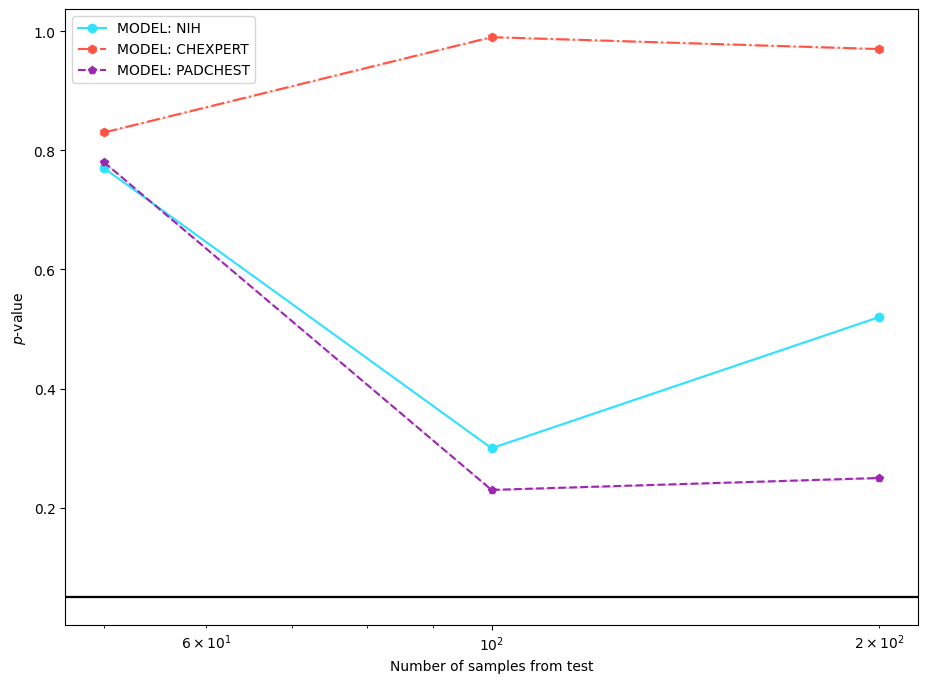

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54530.41 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75094.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84389.63 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89110.07 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92553.48 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96187.05 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49742.34 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71795.78 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84060.29 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 89483.78 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94891.68 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98725.48 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.74 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.19 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.68 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.55 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.09 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.23 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.16 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.12 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.14 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.13 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.52 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.28 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.91 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.67 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.37 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.14 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54220.37 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75089.33 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 86075.60 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92344.00 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95413.75 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97259.68 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50896.78 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72622.94 examples/s]

Filter (num_proc=6):  47%|████▋     | 52374/112120 [00:00<00:00, 70612.81 examples/s]

Filter (num_proc=6):  64%|██████▍   | 72061/112120 [00:00<00:00, 82429.30 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 98003.28 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 100570.75 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.18 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.87 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.54 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.54 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.29 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.18 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.70 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.15 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.46 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.29 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.34 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 36.95 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.94 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.85 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.75 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.23 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 48375.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72997.57 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83838.99 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 87894.11 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93390.89 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96773.37 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:02, 43027.56 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 61682.51 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 75423.24 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:01<00:00, 84069.15 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 90112.69 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97282.05 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.27 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.92 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.81 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.08 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.09 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.72 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.85 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.23 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.03 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.90 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.59 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.50 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.25 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.75 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.50 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.52 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52239.23 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73129.89 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 82264.39 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90652.44 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93377.95 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97020.28 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 49431.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 70658.10 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 79878.22 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90085.30 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 93257.54 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96801.02 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.77 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.22 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.68 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.10 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.84 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.24 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.43 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.78 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.18 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.41 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:10, 16.31 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.66 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 37.69 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 43.90 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 48.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.85 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.09 examples/s]

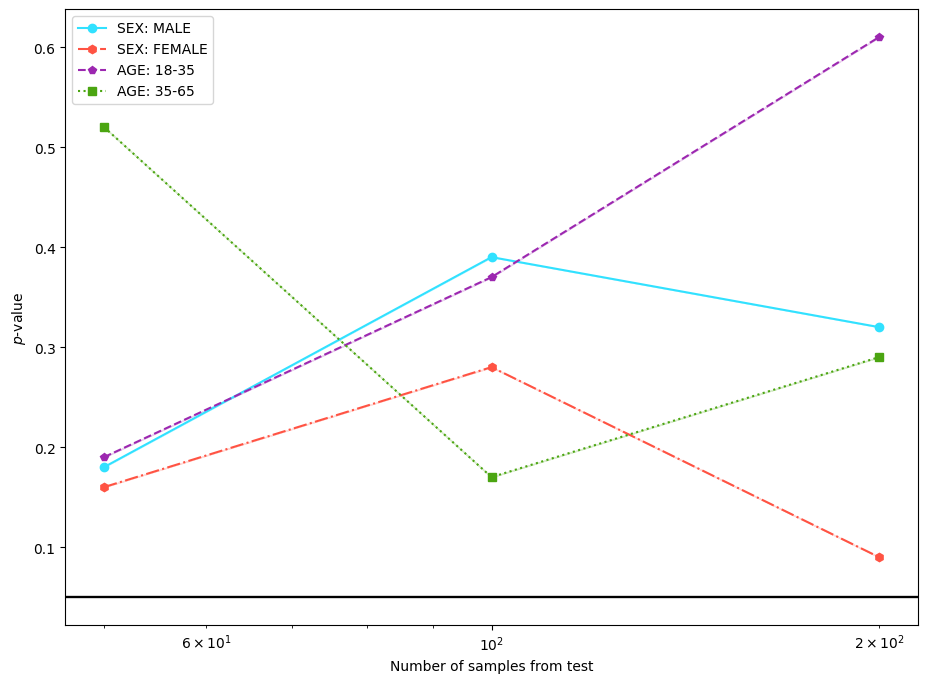

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.46 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.63 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.34 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.40 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.16 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.92 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.36 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.09 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.92 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.35 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.15 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.79 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.36 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.95 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.72 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.40 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.53 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.31 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.67 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.10 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.77 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.08 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.97 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.27 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.28 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.91 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.89 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.00 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.04 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.96 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.04 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.29 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.49 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.08 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.11 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.23 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.19 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.27 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.01 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.39 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

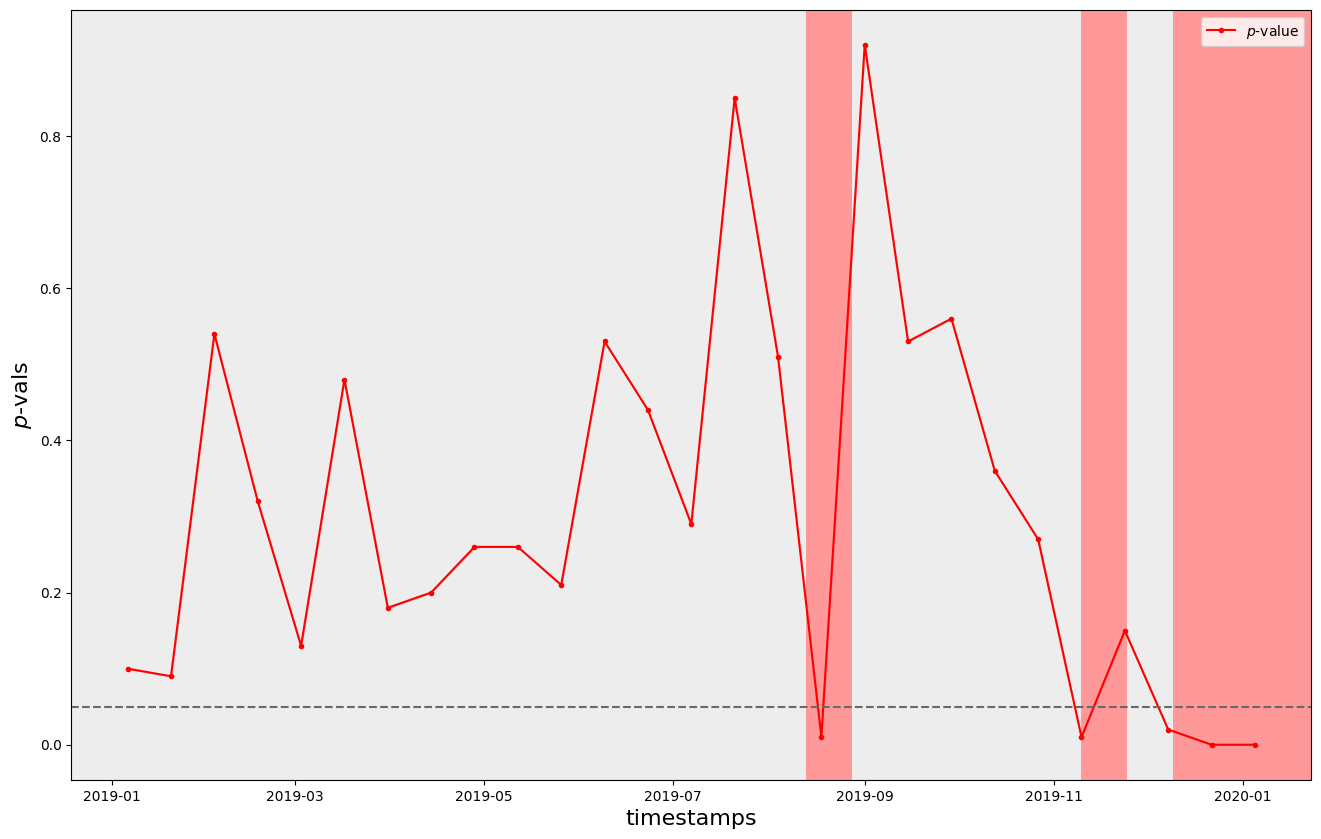

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)